In [1]:
import pandas as pd

Run below to connect to drive in colab environment

In [2]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Path of directory
drive_path = "/content/drive/MyDrive"
root_path = f"{drive_path}/master/code-data/mxene_solvent"
solvent_path = f"{drive_path}/master/code-data/solvent"

In [5]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/008_dataset_mx_solvent_using_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(653, 63)


,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,gap_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,0.0,...,1,1,0,1,0,0,0,1,373.2,760.0
1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,0.0,...,1,1,0,3,0,0,0,1,351.5,760.0
2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,0.0,...,1,1,0,2,0,0,0,1,337.8,760.0
3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,0.0,...,0,1,0,4,0,0,0,1,329.3,760.0
4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,0.0,...,0,1,0,3,0,0,0,1,354.8,760.0


Else run the below to use in local environment

In [2]:
root_path = f"../../data"

In [3]:
# Load data
df_mx_solvent_data_labeled = pd.read_csv(f"{root_path}/008_dataset_mx_solvent_using_polarity_index.csv")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(444, 64)


,unnamed: 0,mx,method,solvent,label,inchikey,p,xe,xd,xn,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,...,1,1,0,1,0,0,0,1,373.2,760.0
1,1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,...,1,1,0,3,0,0,0,1,351.5,760.0
2,2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,...,1,1,0,2,0,0,0,1,337.8,760.0
3,3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,...,0,1,0,4,0,0,0,1,329.3,760.0
4,4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,...,0,1,0,3,0,0,0,1,354.8,760.0


Main body of code

In [4]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]

In [5]:
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [7]:
df_mx_solvent_data_labeled['method'] = df_mx_solvent_data_labeled['method'].astype('category').cat.codes

In [8]:
df_mx_solvent_data_labeled.head()

,unnamed: 0,mx,method,solvent,label,inchikey,p,xe,xd,xn,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,Ti3C2,0,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,1,Ti3C2,0,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,2,Ti3C2,0,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,3,Ti3C2,0,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,4,Ti3C2,0,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [9]:
features = ['method', 'p', 'xe', 'xd', 'xn','work_function_oh',
   'formation_energy_oh', 'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
   'plasmafrequency_x_oh', 'plasmafrequency_y_oh', 'has_inversion_symmetry_oh',
   'gap_o', 'work_function_o', 'formation_energy_o', 'ehull_o',
   'alphax_el_o', 'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
   'has_inversion_symmetry_o', 'work_function_f',
   'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f', 'plasmafrequency_x_f',
   'plasmafrequency_y_f', 'has_inversion_symmetry_f',
   'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count', 'h_bond_acceptor_count',
   'rotatable_bond_count', 'heavy_atom_count', 'atom_stereo_count',
   'boiling_point']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [10]:
X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')

C:\Users\liamr\AppData\Local\Temp\ipykernel_5236\2546690500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')


In [11]:
X.head()

,method,p,xe,xd,xn,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,9.0,0.40,0.34,0.26,1.985656,-1.294839,0.123329,32.369286,32.369286,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,0,5.2,0.51,0.21,0.28,1.985656,-1.294839,0.123329,32.369286,32.369286,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,0,6.6,0.51,0.19,0.30,1.985656,-1.294839,0.123329,32.369286,32.369286,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,0,5.4,0.36,0.24,0.40,1.985656,-1.294839,0.123329,32.369286,32.369286,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,0,6.2,0.33,0.26,0.41,1.985656,-1.294839,0.123329,32.369286,32.369286,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [12]:
y.head()

0    1
1    1
2   -1
3   -1
4   -1
Name: label, dtype: int64

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [15]:
X_train = X_scaled[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [16]:
X_test = X_scaled[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [17]:
clf = SVC(kernel='linear', C=1.0, gamma='scale', probability=True)
clf.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
proba_unlabeled = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

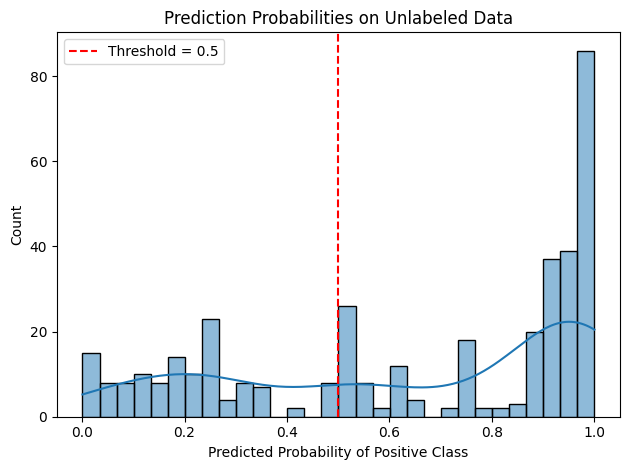

In [20]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba']])

                 solvent     mx  predicted_proba
202    diethylene glycol  Mo2C1         1.000000
203    diethylene glycol  Mo2C1         1.000000
97     diethylene glycol  Nb2C1         1.000000
98     diethylene glycol  Nb2C1         1.000000
149    diethylene glycol   V2C1         1.000000
150    diethylene glycol   V2C1         1.000000
361    diethylene glycol   V4C3         1.000000
362    diethylene glycol   V4C3         1.000000
414    diethylene glycol  Ta4C3         1.000000
415    diethylene glycol  Ta4C3         1.000000
255    diethylene glycol  Ti2C1         1.000000
256    diethylene glycol  Ti2C1         1.000000
60     diethylene glycol  Ti3C2         1.000000
308    diethylene glycol  Zr3C2         1.000000
309    diethylene glycol  Zr3C2         1.000000
194  Propylene Carbonate  Mo2C1         1.000000
195  Propylene Carbonate  Mo2C1         1.000000
89   Propylene Carbonate  Nb2C1         0.999999
90   Propylene Carbonate  Nb2C1         0.999999
141  Propylene Carbo

In [22]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent', 'predicted_proba']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx          solvent  predicted_proba
315  Zr3C2  Dichloromethane         0.000912
314  Zr3C2  Dichloromethane         0.000912
63   Ti3C2  Dichloromethane         0.000912
262  Ti2C1  Dichloromethane         0.002464
261  Ti2C1  Dichloromethane         0.002464
421  Ta4C3  Dichloromethane         0.002722
420  Ta4C3  Dichloromethane         0.002722
368   V4C3  Dichloromethane         0.002824
367   V4C3  Dichloromethane         0.002824
156   V2C1  Dichloromethane         0.002878
155   V2C1  Dichloromethane         0.002878
104  Nb2C1  Dichloromethane         0.003123
103  Nb2C1  Dichloromethane         0.003123
209  Mo2C1  Dichloromethane         0.004338
208  Mo2C1  Dichloromethane         0.004338
323  Zr3C2    Triethylamine         0.038766
322  Zr3C2    Triethylamine         0.038767
67   Ti3C2    Triethylamine         0.038781
303  Zr3C2          Toluene         0.062927
302  Zr3C2          Toluene         0.06

In [23]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    386.000000
mean       0.645375
std        0.344738
min        0.000912
25%        0.276034
50%        0.763642
75%        0.957675
max        1.000000
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)           28
Low (0.1–0.3)             72
Mid (0.3–0.5)             25
High (0.5–0.7)            52
Very High (0.7–0.9)       47
Extremely High (>0.9)    162
Name: count, dtype: int64


Again, use the below if running in colab

In [24]:
train_path = f"{drive_path}/master/code-data/training/"

NameError: name 'drive_path' is not defined

In [ ]:
df_unlabeled.to_csv(f"{train_path}/003_positive_vs_negative_predictions_on_unlabeled_svc.csv")
df_unlabeled.to_pickle(f"{train_path}/003_positive_vs_negative_predictions_on_unlabeled_svc.pkl")


If running locally, use the below

In [25]:
df_unlabeled.to_csv(f"003_positive_vs_negative_predictions_on_unlabeled_svc.csv")
df_unlabeled.to_pickle(f"003_positive_vs_negative_predictions_on_unlabeled_svc.pkl")

Main body of code

                                             Feature    Importance
boiling_point                          boiling_point  1.329844e+00
xn                                                xn  9.088494e-01
xlogp                                          xlogp  7.951229e-01
xd                                                xd  6.938653e-01
tpsa                                            tpsa  6.826412e-01
complexity                                complexity  5.968147e-01
h_bond_donor_count                h_bond_donor_count  5.961344e-01
p                                                  p  5.726426e-01
rotatable_bond_count            rotatable_bond_count  5.327956e-01
h_bond_acceptor_count          h_bond_acceptor_count  2.314571e-01
molecular_weight                    molecular_weight  1.592428e-01
heavy_atom_count                    heavy_atom_count  1.304905e-01
has_inversion_symmetry_oh  has_inversion_symmetry_oh  9.514488e-02
has_inversion_symmetry_f    has_inversion_symmetry_f  9.514488

C:\Users\liamr\AppData\Local\Temp\ipykernel_5236\1863205878.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


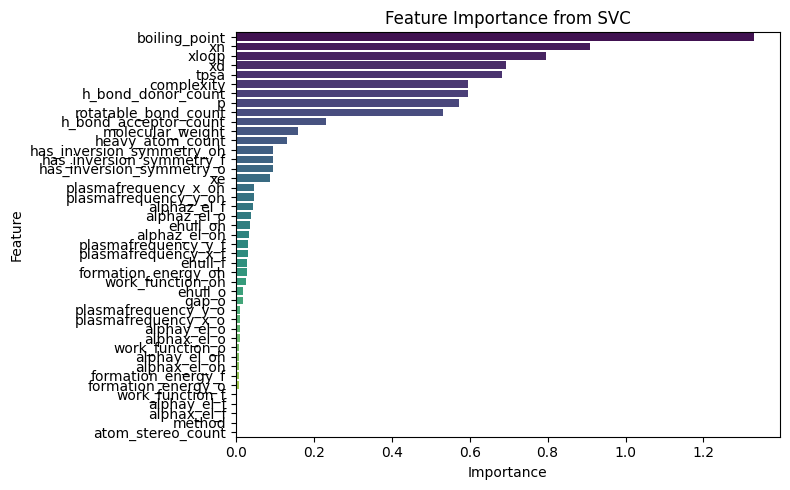

In [26]:
feature_names = features
importances = pd.Series(abs(clf.coef_[0]), index=feature_names)

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from SVC')
plt.tight_layout()
plt.show()

Top 10 Feature Importances:
                                     Feature  Importance
boiling_point                  boiling_point    1.329844
xn                                        xn    0.908849
xlogp                                  xlogp    0.795123
xd                                        xd    0.693865
tpsa                                    tpsa    0.682641
complexity                        complexity    0.596815
h_bond_donor_count        h_bond_donor_count    0.596134
p                                          p    0.572643
rotatable_bond_count    rotatable_bond_count    0.532796
h_bond_acceptor_count  h_bond_acceptor_count    0.231457


C:\Users\liamr\AppData\Local\Temp\ipykernel_5236\692532943.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


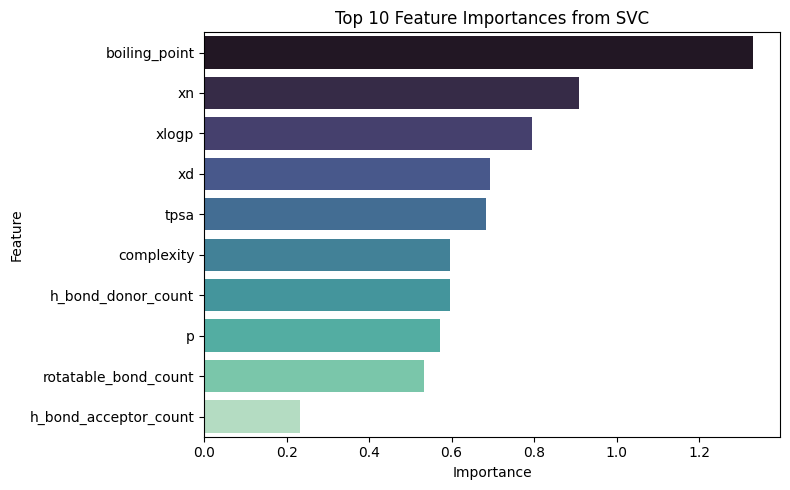

In [27]:

# Create and sort feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)  # Change to .head(15) for top 15

# Print top features
print("Top 10 Feature Importances:")
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title('Top 10 Feature Importances from SVC')
plt.tight_layout()
plt.show()

       boiling_point          xn       xlogp          xd        tpsa  \
count     444.000000  444.000000  444.000000  444.000000  444.000000   
mean      399.338964    0.355541    0.554955    0.237095   17.329730   
std        59.037012    0.065133    1.379092    0.067248   13.663389   
min       313.000000    0.250000   -1.300000    0.070000    0.000000   
25%       350.200000    0.300000   -0.500000    0.200000    1.000000   
50%       383.800000    0.360000    0.300000    0.230000   20.200000   
75%       455.700000    0.410000    1.500000    0.270000   23.800000   
max       519.000000    0.490000    3.200000    0.390000   49.700000   

       complexity  h_bond_donor_count           p  rotatable_bond_count  \
count  444.000000          444.000000  444.000000            444.000000   
mean    31.420721            0.369369    4.882432              0.576577   
std     24.542274            0.552898    1.781003              1.431976   
min      0.000000            0.000000    1.700000  

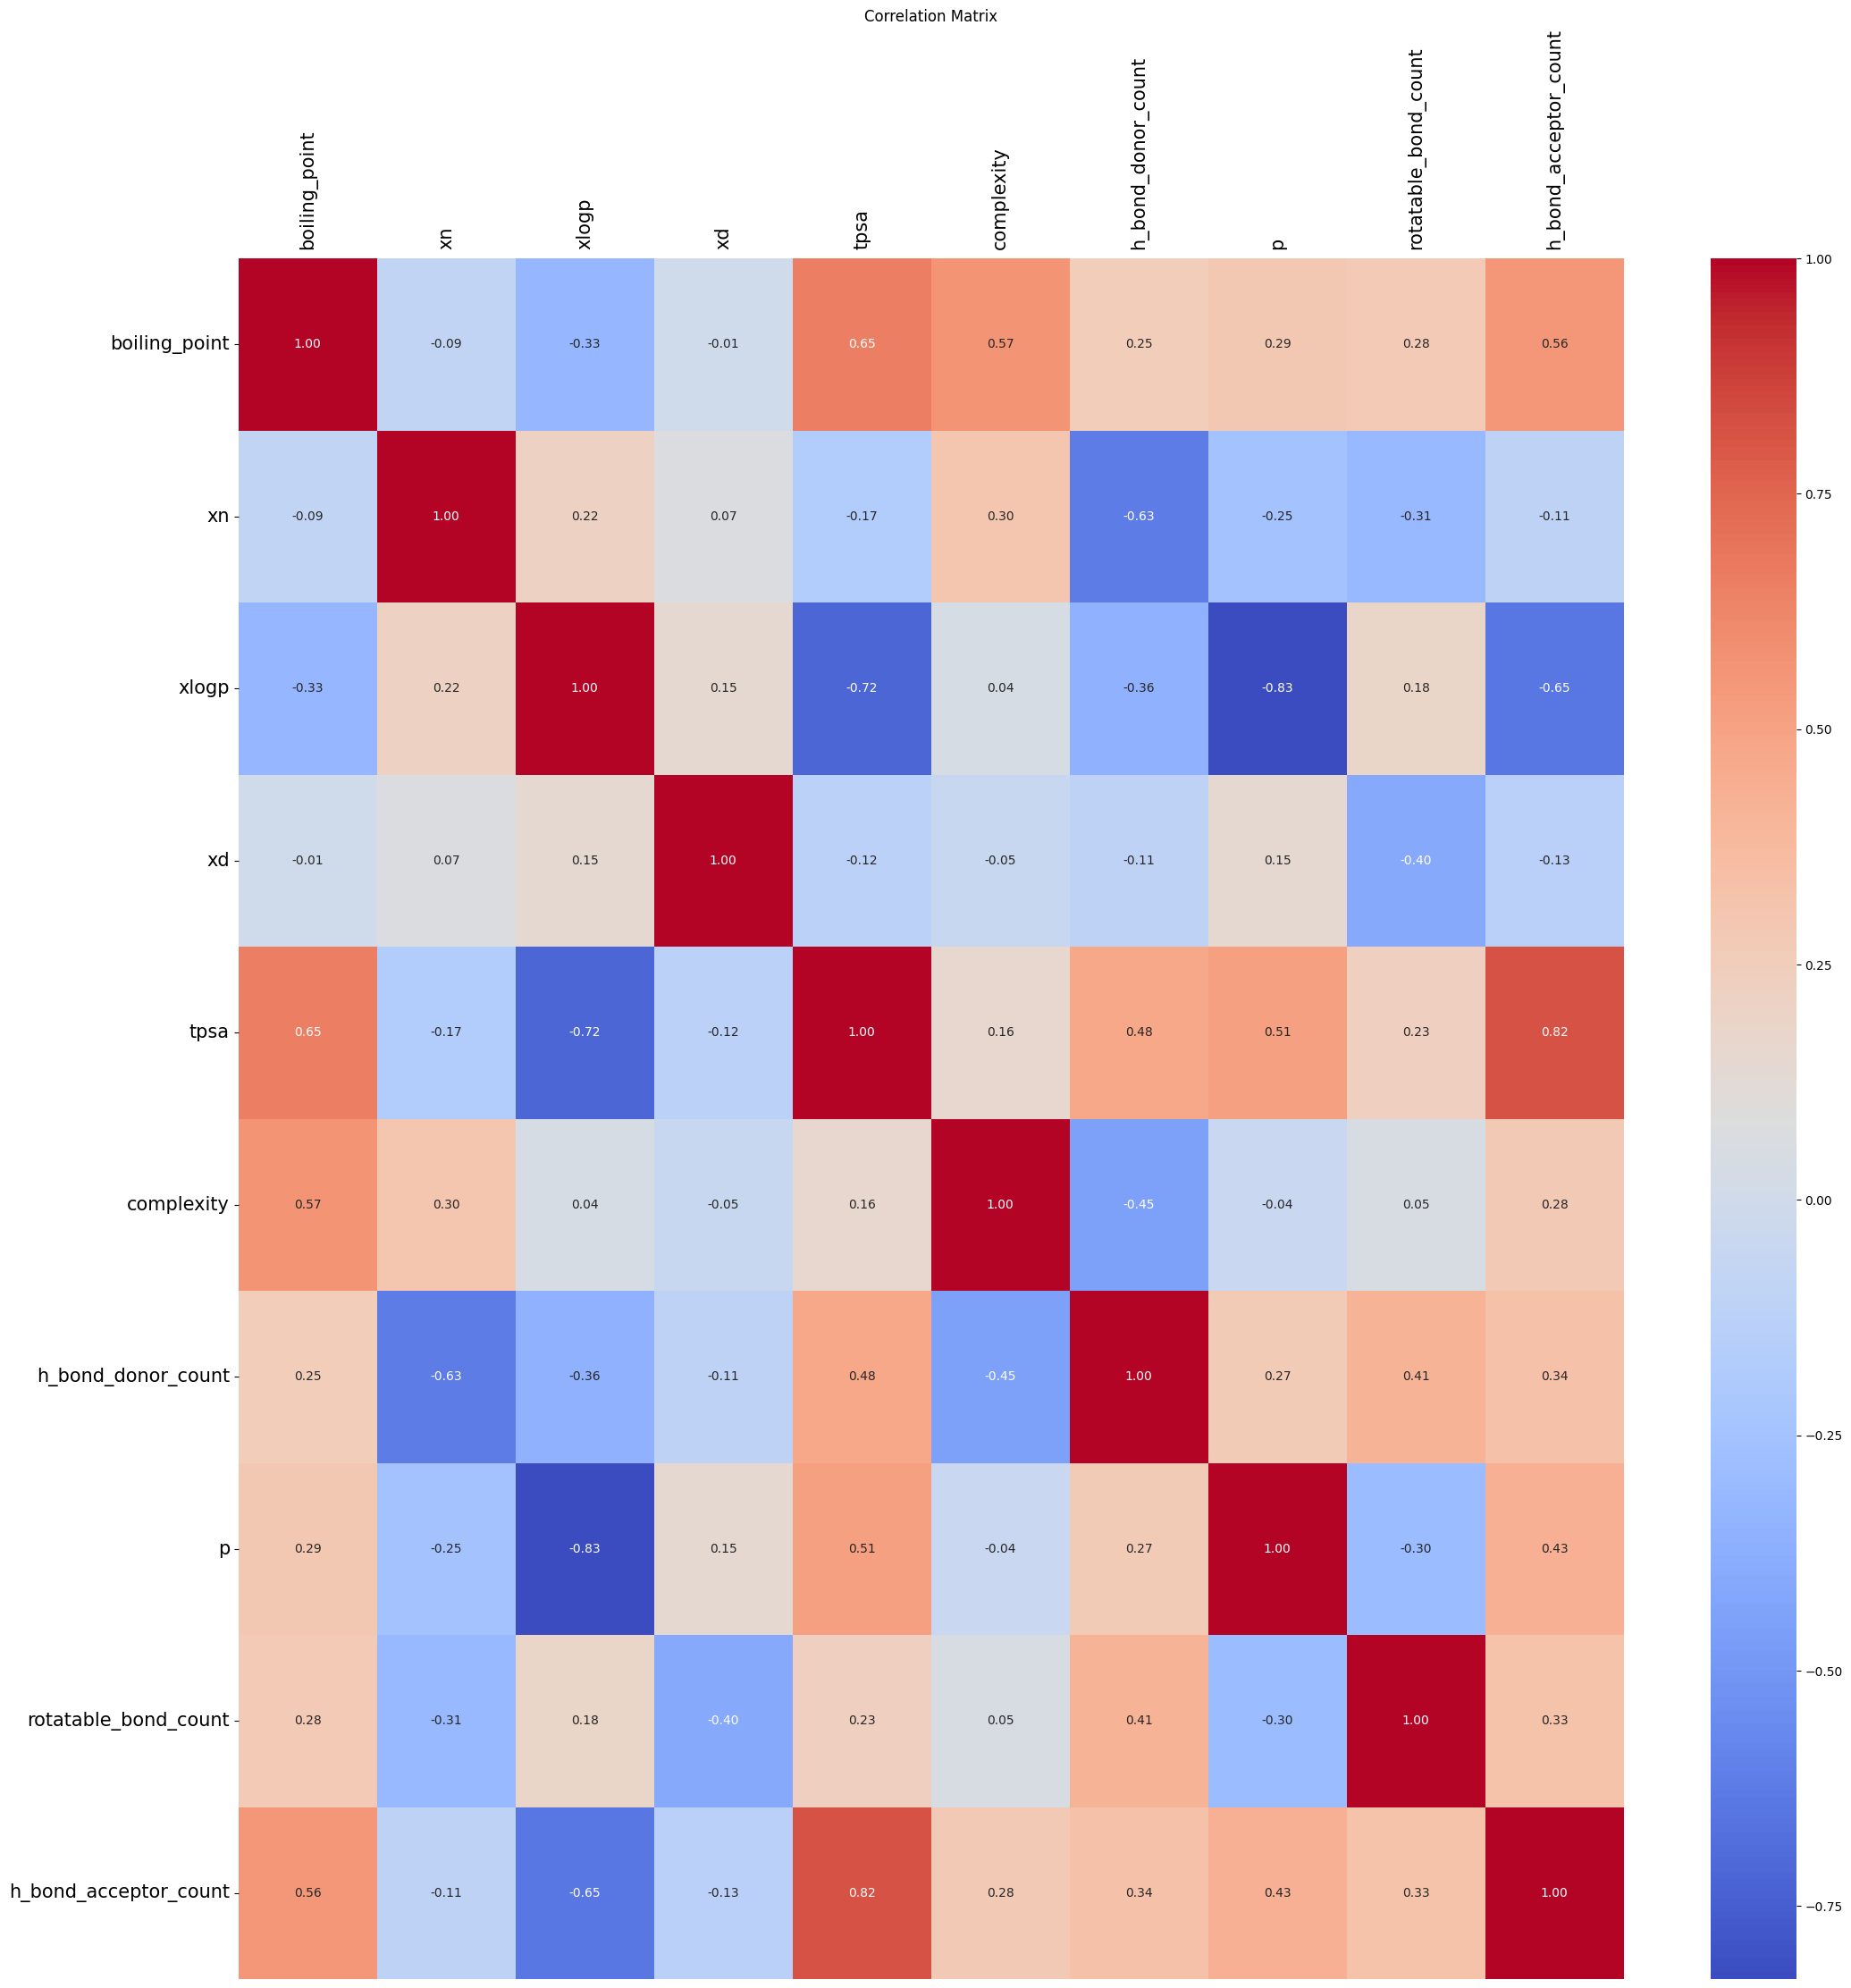

In [28]:
highimpdf = df_mx_solvent_data_labeled[feat_imp_df["Feature"]]
print(highimpdf.describe())

correlation_matrix = highimpdf.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.tick_params(axis='y', which='major', labelsize=15, labelrotation=0)
plt.show()

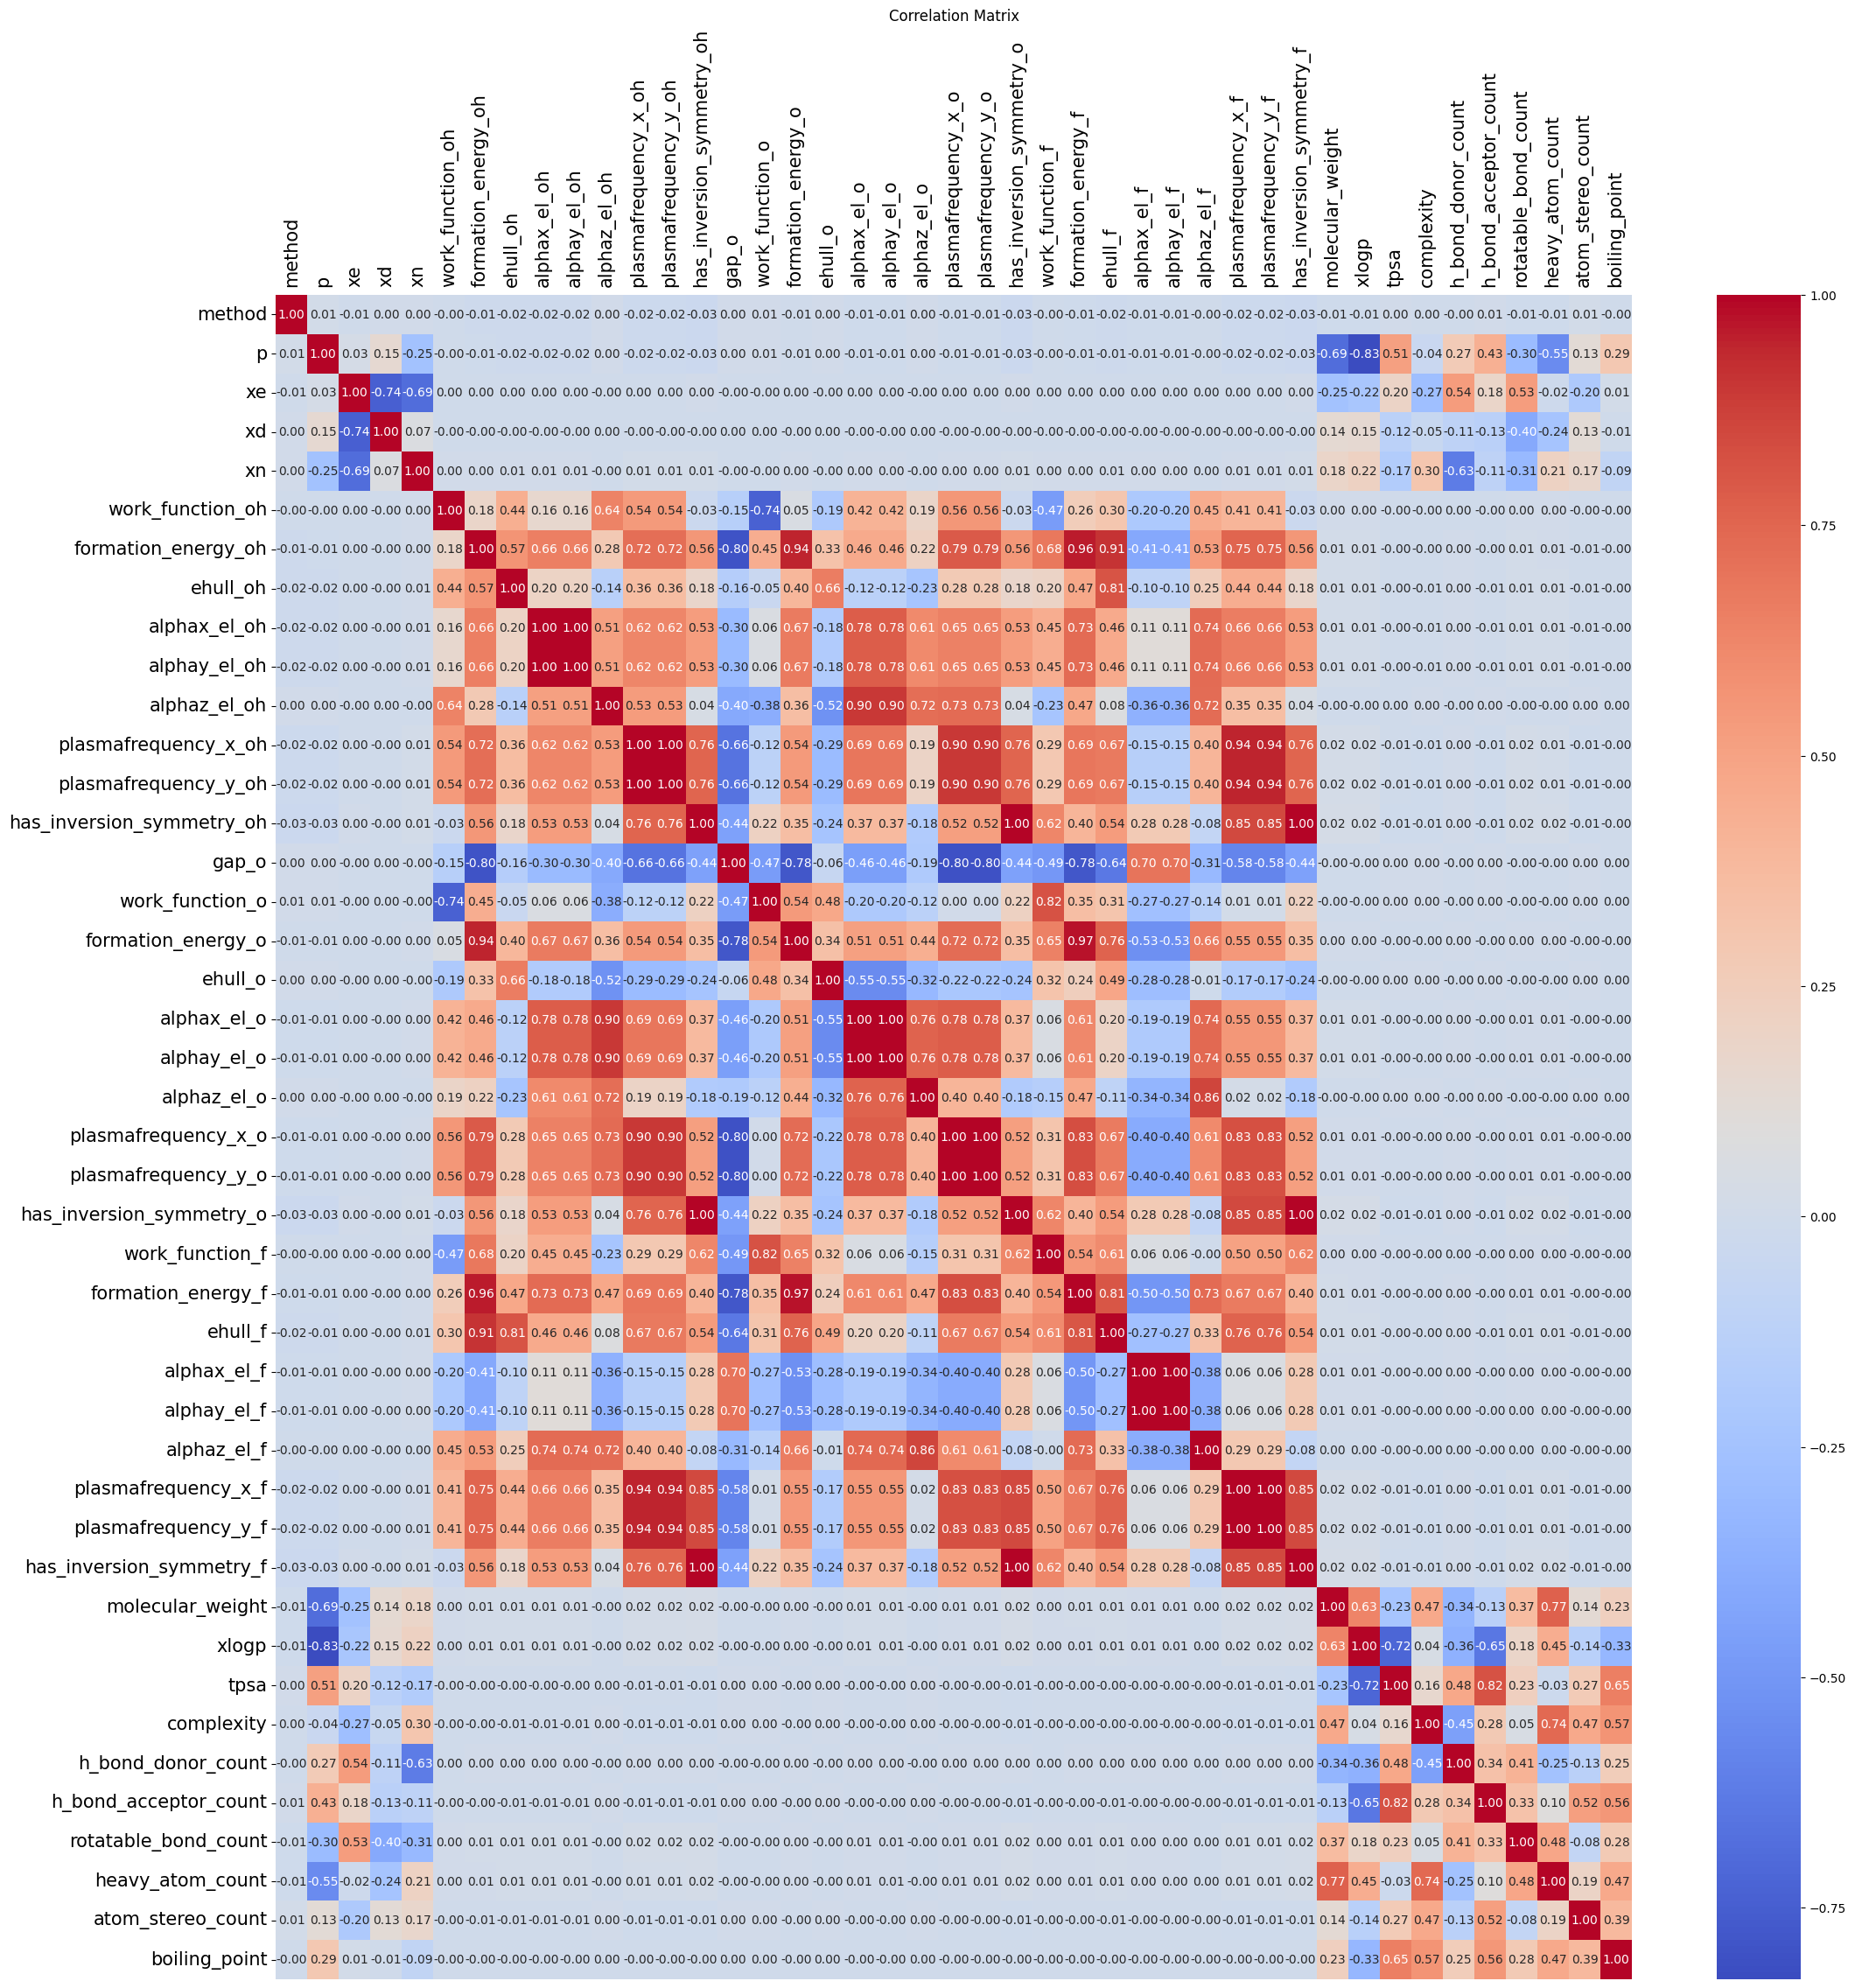

In [29]:
correlation_matrix = df_mx_solvent_data_labeled[features].corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.tick_params(axis='y', which='major', labelsize=15, labelrotation=0)
plt.show()